<a href="https://colab.research.google.com/github/G0807/retail-sales-analysis/blob/main/Projeto1vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e lendo o arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df_original = pd.read_excel('/content/Vendas2.xlsx')
display(df_original)


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


Criando um Dataframe amostra (somente para simulação a quantidade de dados original não é grande o bastante para este procedimento, o dataframe original pode ser analisado tranquilamente, o processo de amostragem aqui só tem efeito didático.)

In [2]:
df_amostra = df_original.sample(n=1000)
display(df_amostra)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
33642,23167,2019-05-01,Shopping Eldorado,Casaco Liso,5,255,1275
90915,62946,2019-11-20,Center Shopping Uberlândia,Cueca,2,50,100
88486,61257,2019-11-11,Rio Mar Shopping Fortaleza,Cinto,5,200,1000
53930,37273,2019-07-12,Shopping Barra,Camiseta Linho,3,223,669
19652,13553,2019-03-12,Iguatemi Esplanada,Short Listrado,2,102,204
...,...,...,...,...,...,...,...
39097,26948,2019-05-20,Shopping União de Osasco,Sapato Linho,1,391,391
32043,22050,2019-04-25,Shopping Midway Mall,Polo Estampa,1,138,138
62105,42939,2019-08-10,Shopping União de Osasco,Tênis Xadrez,1,259,259
46410,31970,2019-06-15,Shopping Midway Mall,Camisa Listrado,3,108,324


Verificando o tipo de dados e alterando aqueles cujo o valor não é ideal para a análise

In [3]:
df_amostra['Data'] = pd.to_datetime(df_amostra['Data'])
print(df_amostra.dtypes)

Código Venda               int64
Data              datetime64[ns]
ID Loja                   object
Produto                   object
Quantidade                 int64
Valor Unitário             int64
Valor Final                int64
dtype: object


Veficando se há  NaN.

In [4]:
df_amostra.isnull().sum()

,0
Código Venda,0
Data,0
ID Loja,0
Produto,0
Quantidade,0
Valor Unitário,0
Valor Final,0


Verificando se há linhas repetidas.

In [5]:
duplicadas = df_amostra.duplicated()
print(duplicadas.sum())

0


 Análise Exploratória de Dados (EDA)
 Abtendo valor total de vendas.

In [6]:
valor_total = df_amostra['Valor Final'].sum()
print(valor_total)

413747


Total de itens vendidos

In [7]:
total_itens = df_amostra['Quantidade'].sum()
print(total_itens)

2181


Desempenho por Loja:
 Top 5 lojas com maior valor de vendas.

In [8]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)
display(top_lojas)

,Valor Final
ID Loja,
Shopping Iguatemi Fortaleza,24985
Shopping União de Osasco,21542
Center Shopping Uberlândia,21529
Iguatemi Campinas,20229
Bourbon Shopping SP,18920


 A média de vendas por loja.

In [9]:
media_lojas = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').mean().sort_values(by='Quantidade',ascending=False)
display(media_lojas)

,Quantidade
ID Loja,
Shopping Eldorado,2.575000
Palladium Shopping Curitiba,2.542857
Bourbon Shopping SP,2.384615
Ribeirão Shopping,2.333333
Shopping Barra,2.303030
Salvador Shopping,2.285714
Shopping Recife,2.282051
Rio Mar Shopping Fortaleza,2.250000
Center Shopping Uberlândia,2.243902


Top 5. Lojas com maior número de vendas.

In [65]:
top_lojas_quantidade = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').sum().sort_values(by='Quantidade',ascending=False).head(5)
display(top_lojas_quantidade)

,Quantidade
ID Loja,
Iguatemi Campinas,114
Shopping Eldorado,103
Shopping União de Osasco,96
Salvador Shopping,96
Shopping Center Interlagos,96


Lojas com menor número de vendas em quantidade.

In [79]:
min_lojas_quantidade = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').sum().sort_values(by='Quantidade',ascending=True)
display(min_lojas_quantidade.head(7))


,Quantidade
ID Loja,
Parque Dom Pedro Shopping,68
Ribeirão Shopping,70
Passei das Águas Shopping,71
Rio Mar Shopping Fortaleza,72
Novo Shopping Ribeirão Preto,75
Shopping Barra,76
Shopping SP Market,77


Lojas com menor valor de vendas lucro bruto.

In [80]:
min_lojas_valor_final = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=True)
display(min_lojas_valor_final.head(7))

,Valor Final
ID Loja,
Shopping Barra,10368
Shopping SP Market,11789
Ribeirão Shopping,12426
Shopping Vila Velha,13297
Shopping Midway Mall,14205
Shopping Recife,14853
Parque Dom Pedro Shopping,14879


 top 5 produtos mais vendidos

In [10]:
df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)

,Quantidade
Produto,
Camisa Gola V Listrado,39
Sunga Xadrez,37
Camisa Gola V Liso,36
Cueca,35
Tênis Listrado,34


" o código abaixo é sujestão do Colab.

In [11]:
top_produtos = df_amostra.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(5)
display(top_produtos)

,Quantidade
Produto,
Camisa Gola V Listrado,39
Sunga Xadrez,37
Camisa Gola V Liso,36
Cueca,35
Tênis Listrado,34


Lucro bruto por produdo

In [12]:
lucro_bruto = df_amostra.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(lucro_bruto)

,Valor Final
Produto,
Terno Linho,17250
Terno Liso,15840
Terno Estampa,14826
Sapato Liso,12144
Sapato Listrado,9801
...,...
Meia Estampa,600
Pulseira,560
Camiseta,540


Análise Temporal

Vendas por mês

In [13]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
display(vendas_por_mes)

,Valor Final
Data,
1,26725
2,27894
3,31009
4,36282
5,46957
6,31288
7,33179
8,40231
9,42332


Vendas Trimestrais

In [14]:
vendas_trimestrais = df_amostra.groupby(df_amostra['Data'].dt.to_period('Q'))['Valor Final'].sum()
display(vendas_trimestrais)

,Valor Final
Data,
2019Q1,85628
2019Q2,114527
2019Q3,115742
2019Q4,97850


 Meses com maior e menor volume de vendas

In [15]:
mes_maior_volume = vendas_por_mes.idxmax()
mes_menor_volume = vendas_por_mes.idxmin()
print(f"O mês com maior volume de vendas foi {mes_maior_volume} com um total de R${vendas_por_mes.max():.2f}")
print(f"O mês com menor volume de vendas foi {mes_menor_volume} com um total de R${vendas_por_mes.min():.2f}")

O mês com maior volume de vendas foi 5 com um total de R$46957.00
O mês com menor volume de vendas foi 12 com um total de R$22529.00


Visualização de Dados:

 Vendas totais por loja (top 5).

<ipython-input-16-b5820561e918>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')


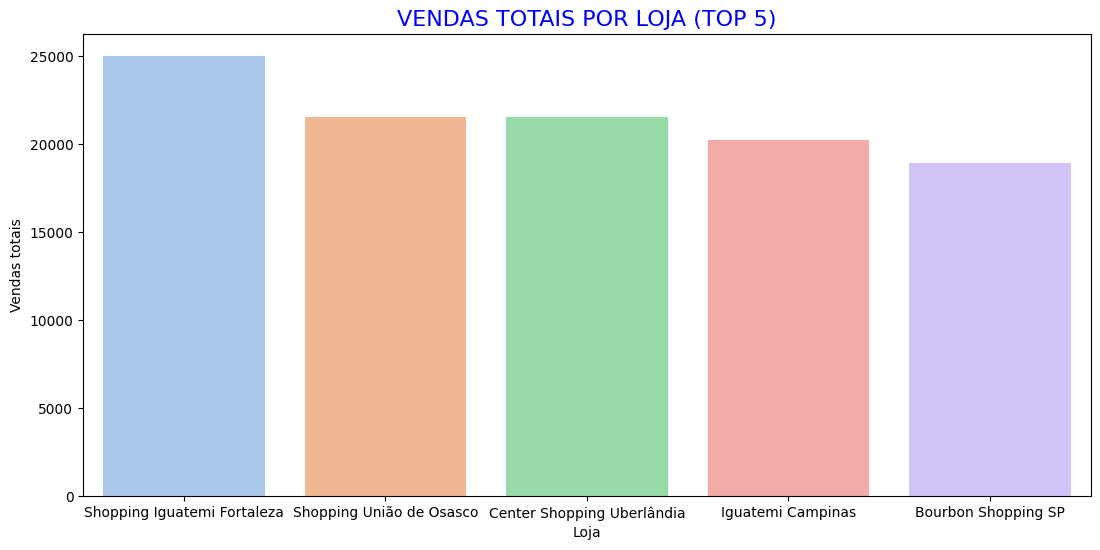

In [16]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)

plt.figure(figsize=(13, 6))
sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')
plt.title('VENDAS TOTAIS POR LOJA (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Loja')
plt.ylabel('Vendas totais')
plt.show()

Vendas totais por produto (top 5)

<ipython-input-17-aba74e737705>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')


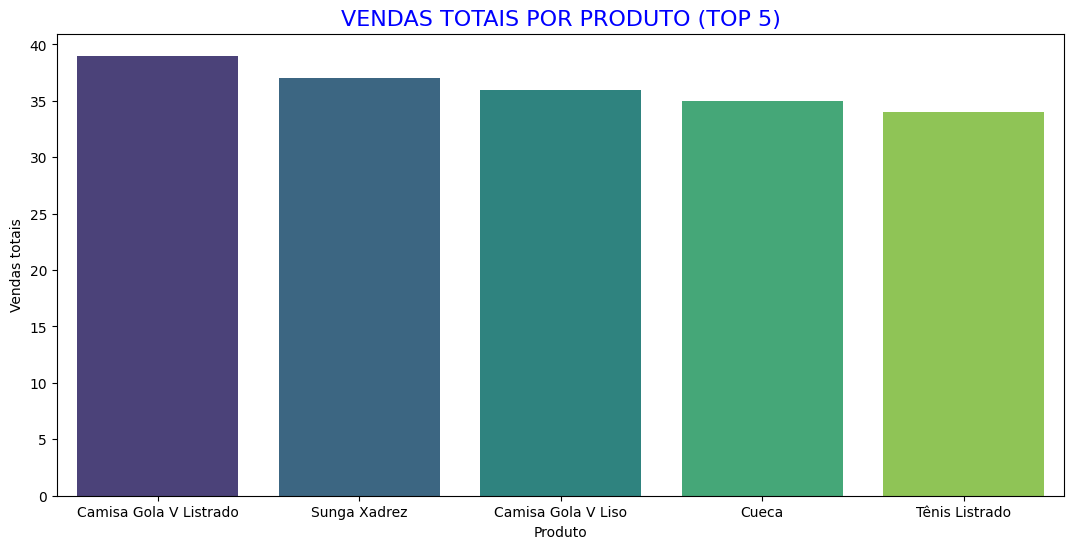

In [17]:
top_5produtos = df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)
plt.figure(figsize=(13,6))
sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')
plt.title('VENDAS TOTAIS POR PRODUTO (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Produto')
plt.ylabel('Vendas totais')
plt.show()


Vendas mensais ao longo do ano.

Text(0, 0.5, 'Vendas totais')

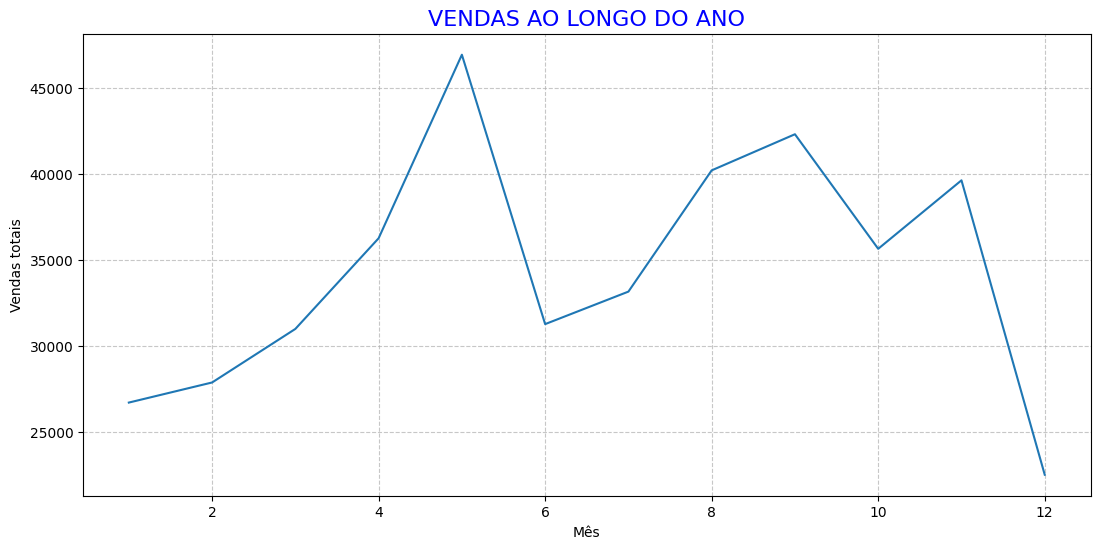

In [18]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
plt.figure(figsize=(13,6))
sns.lineplot(x=vendas_por_mes.index,y=vendas_por_mes.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('VENDAS AO LONGO DO ANO', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas totais')

 A relação entre Quantidade e Valor Final

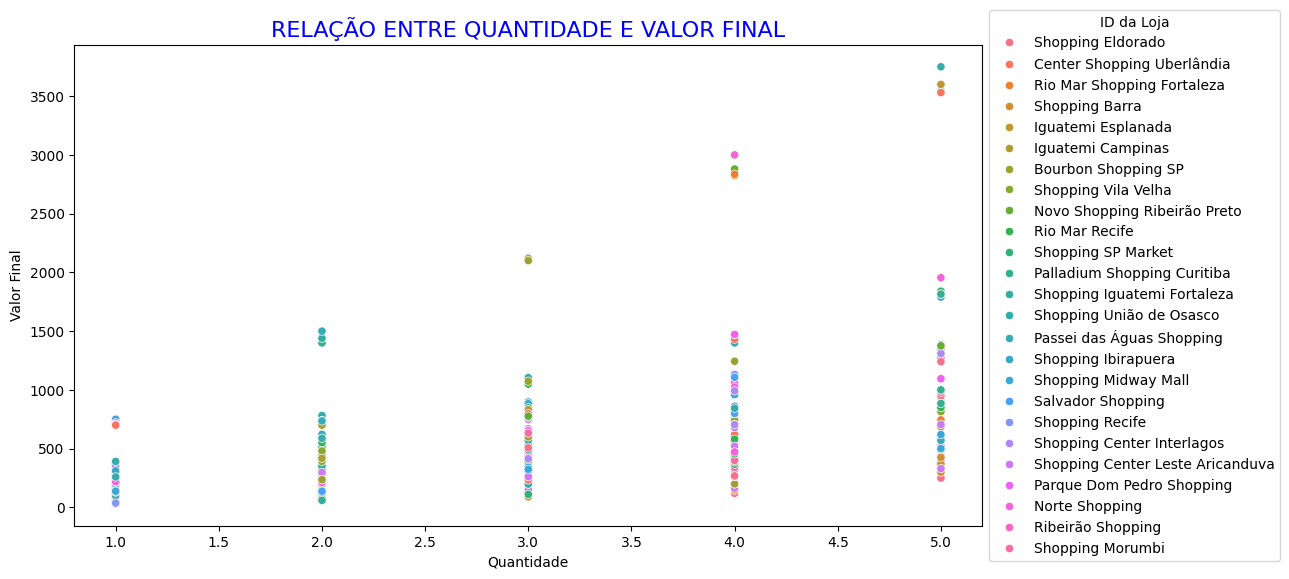

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(13,6))
sns.scatterplot(x='Quantidade',y='Valor Final',data=df_amostra,hue='ID Loja')

plt.title('RELAÇÃO ENTRE QUANTIDADE E VALOR FINAL', fontsize=16, color='blue', loc='center')
plt.xlabel('Quantidade')
plt.ylabel('Valor Final')

# --- Adicionando e Posicionando a Legenda ---
plt.legend(title='ID da Loja', loc='center left', bbox_to_anchor=(1, 0.5))
# title: Título da legenda (opcional, mas bom para clareza)
# loc: Posição "interna" da legenda antes de ancorar. 'center left' é um bom ponto de partida.
# bbox_to_anchor:
#    (1, 0.5) significa:
#    1: Ancorar a legenda à direita da área de plotagem (1.0 é o extremo direito).
#    0.5: Ancorar no meio da altura vertical da área de plotagem (0.5 é o meio).

plt.tight_layout() # Garante que a legenda não seja cortada fora da figura

plt.show()

Informações Extras: Nome das lojas


In [20]:
display(df_amostra['ID Loja'].unique())

array(['Shopping Eldorado', 'Center Shopping Uberlândia',
       'Rio Mar Shopping Fortaleza', 'Shopping Barra',
       'Iguatemi Esplanada', 'Iguatemi Campinas', 'Bourbon Shopping SP',
       'Shopping Vila Velha', 'Novo Shopping Ribeirão Preto',
       'Rio Mar Recife', 'Shopping SP Market',
       'Palladium Shopping Curitiba', 'Shopping Iguatemi Fortaleza',
       'Shopping União de Osasco', 'Passei das Águas Shopping',
       'Shopping Ibirapuera', 'Shopping Midway Mall', 'Salvador Shopping',
       'Shopping Recife', 'Shopping Center Interlagos',
       'Shopping Center Leste Aricanduva', 'Parque Dom Pedro Shopping',
       'Norte Shopping', 'Ribeirão Shopping', 'Shopping Morumbi'],
      dtype=object)

 numero de ocorrencia das lojas

In [21]:
ocorrencias = df_amostra['ID Loja'].value_counts()
print(ocorrencias)

ID Loja
Iguatemi Campinas                   52
Shopping Center Leste Aricanduva    48
Shopping União de Osasco            47
Shopping Center Interlagos          46
Rio Mar Recife                      44
Norte Shopping                      43
Shopping Vila Velha                 42
Salvador Shopping                   42
Shopping Iguatemi Fortaleza         42
Shopping Morumbi                    42
Shopping Ibirapuera                 41
Center Shopping Uberlândia          41
Iguatemi Esplanada                  41
Shopping Eldorado                   40
Shopping Recife                     39
Parque Dom Pedro Shopping           39
Bourbon Shopping SP                 39
Shopping SP Market                  37
Shopping Midway Mall                37
Novo Shopping Ribeirão Preto        35
Palladium Shopping Curitiba         35
Passei das Águas Shopping           33
Shopping Barra                      33
Rio Mar Shopping Fortaleza          32
Ribeirão Shopping                   30
Name: count, dtyp

Resultado da analise:

Quais foram as lojas com melhor desempenho?

Shopping Center Leste Aricanduva	34206,
Rio Mar Recife	20577,
Shopping Center Interlagos	20337,
Palladium Shopping Curitiba	19280,
Bourbon Shopping SP	18935.

Quais produtos foram os "campeões de vendas"?
Calça Liso	45,
Calça	42,
Camisa Xadrez	41,
Pulseira Estampa	35,
Terno Linho	33,

Houve alguma sazonalidade nas vendas (picos em certos meses, quedas em outros)?

O mês com maior volume de vendas foi outubro com total R$48540.00

 e o mês com o menor volume de vendas foi dezembro com o total de R$ 24094.00.

Quais poderiam ser os próximos passos para otimizar as vendas (por exemplo, focar em marketing para produtos de baixo desempenho ou investir mais nas lojas de melhor desempenho)?

focar no marketing para produtos de baixo desempenho não é vialvel, pela analise chegamos a conclusão que mesmo com um alto fluxo de vendas estes produtos não consiguiram igualar os lucros de produtos mais caros com baixo fluxo de venda. Então o foco é investir nas lojas. Observação: seria bom fazer uma analize personalizada para as lojas de alto desempenho e descubrir os motivos do seu alto desempenho para aplicar nas demais se possivel.


PARTE 2

Aprofundamento.

1. Receita média por item vendido

In [22]:
media_produtos = df_amostra[['Produto','Valor Final']].groupby('Produto').mean().sort_values(by='Valor Final',ascending=False)
display(media_produtos)

,Valor Final
Produto,
Terno Listrado,1772.500000
Terno Liso,1760.000000
Terno Linho,1725.000000
Terno Estampa,1647.333333
Terno Xadrez,1418.000000
...,...
Meia Listrado,95.142857
Meia Xadrez,82.000000
Meia Estampa,75.000000


2. Análise Detalhada das Lojas de Alto Desempenho:

Padrões de Produtos: Quais produtos são mais vendidos (em quantidade e valor) nas lojas de alto desempenho? Há alguma diferença significativa nos "campeões de vendas" entre as lojas de topo e as de baixo desempenho?

Analisando hipótese de influencia dos Produdos no desempenho das lojas top 5

'Shopping Iguatemi Fortaleza' Top 1

,Quantidade
Produto,
Bermuda Listrado,8
Terno Listrado,8
Calça,6
Terno Linho,5
Calça Estampa,5
Tênis Listrado,5
Camiseta Xadrez,4


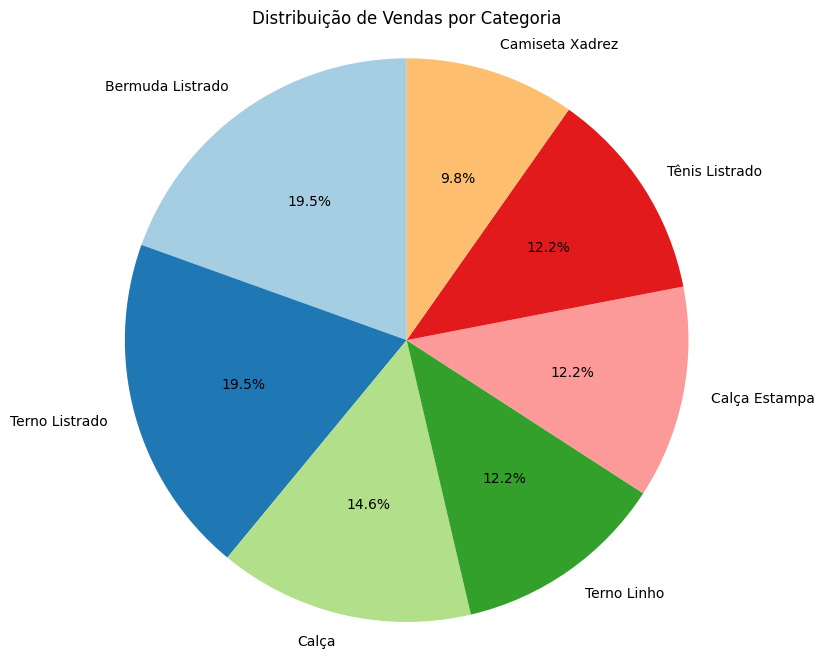

In [59]:
# Primeiro, filtre o DataFrame para incluir apenas as vendas do "Shopping Iguatemi Fortaleza"
df_iguatemi = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']

# Em seguida, agrupe por 'Produto' e some a 'Quantidade' para este subconjunto
Shopping_Iguatemi_Fortaleza = df_iguatemi.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# Por fim, exiba o resultado
display(Shopping_Iguatemi_Fortaleza.head(7))
top_7_produtos_fortaleza = Shopping_Iguatemi_Fortaleza.head(7)
lista_produtos = top_7_produtos_fortaleza.index.tolist()
lista_quantidades = top_7_produtos_fortaleza.values.tolist()
# --- Criando o Gráfico de Pizza ---
plt.figure(figsize=(8, 8)) # Define o tamanho da figura (largura, altura)

plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# 'autopct='%1.1f%%'' formata os percentuais dentro das fatias (1 casa decimal)
# 'startangle=90' inicia a primeira fatia no topo (ângulo de 90 graus)
# 'colors=plt.cm.Paired.colors' usa uma paleta de cores predefinida para deixar mais bonito

plt.title('Distribuição de Vendas por Categoria') # Adiciona um título ao gráfico
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo perfeito
plt.show() # Exibe o gráfico


78% das vendas são de produtos de medio e  alto valor.

,Valor Final
Produto,
Terno Listrado,5672
Terno Linho,3750
Terno Liso,1440
Tênis Listrado,1310
Bermuda Listrado,1304
Calça,1020
Calça Estampa,885


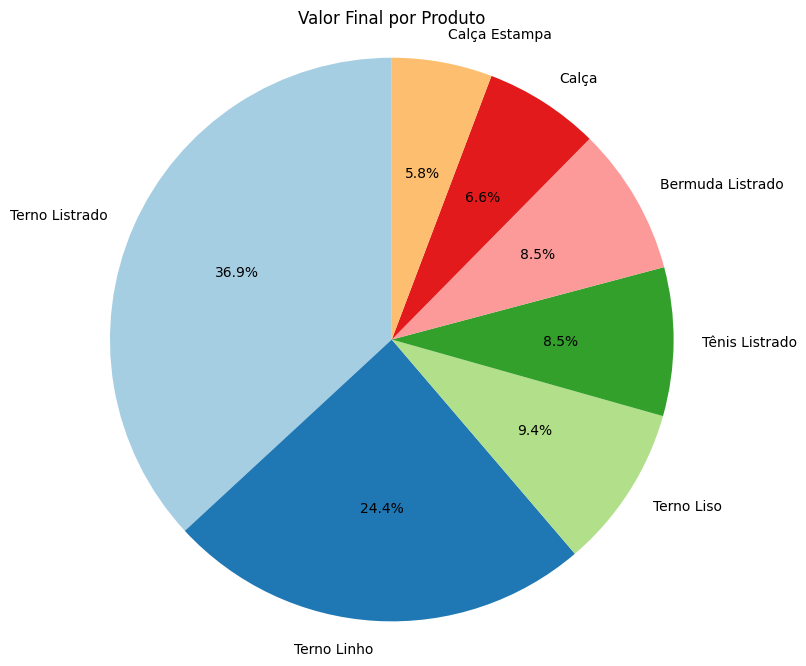

In [85]:
# valor final total por produto para o "Shopping Iguatemi Fortaleza"!
top_1 = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']
valor_final_por_produto = top_1.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Comparando os dois graficos e pegando como base os produtos Bermuda listrada 19,5 % das vendas e terno linho 12,2% das vendas mesmo tendo uma quantia menor ainda assim é quase 3 vezes mais lucrativo.

E itens como camiseta xadres mesmo estando entre os tops produtos em quantidade de vendas, nem sequer aparece entre os que mais geram lucro para a loja.

Shopping União de Osasco	Top 2

,Quantidade
Produto,
Chinelo Liso,5
Short Estampa,5
Sapato Liso,5
Terno Linho,5
Mochila Estampa,4
Camisa Linho,4
Calça Linho,4


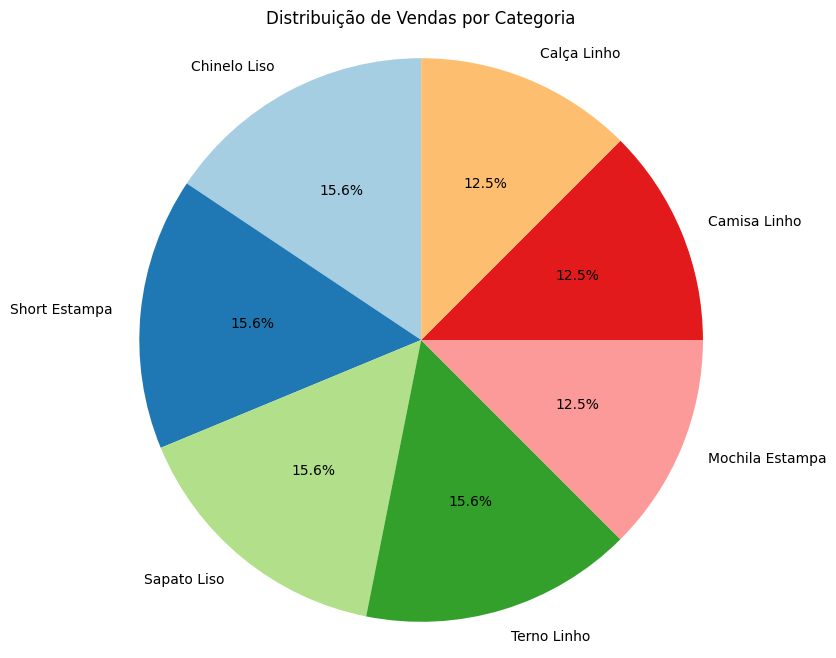

In [53]:
df_osasco = df_amostra[df_amostra['ID Loja'] == 'Shopping União de Osasco']
Shopping_União_de_Osasco = df_osasco.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_União_de_Osasco.head(7))
top_7_produtos_osasco = Shopping_União_de_Osasco.head(7)
# Transformando em listas
lista_produtos = top_7_produtos_osasco.index.tolist()
lista_quantidades = top_7_produtos_osasco.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

43,7% das vendas são de produtos de medio e alto valor.

,Valor Final
Produto,
Terno Linho,3750
Sapato Liso,1840
Sapato Linho,1173
Mochila Estampa,1108
Calça Linho,844
Cinto Estampa,836
Mochila Listrado,825


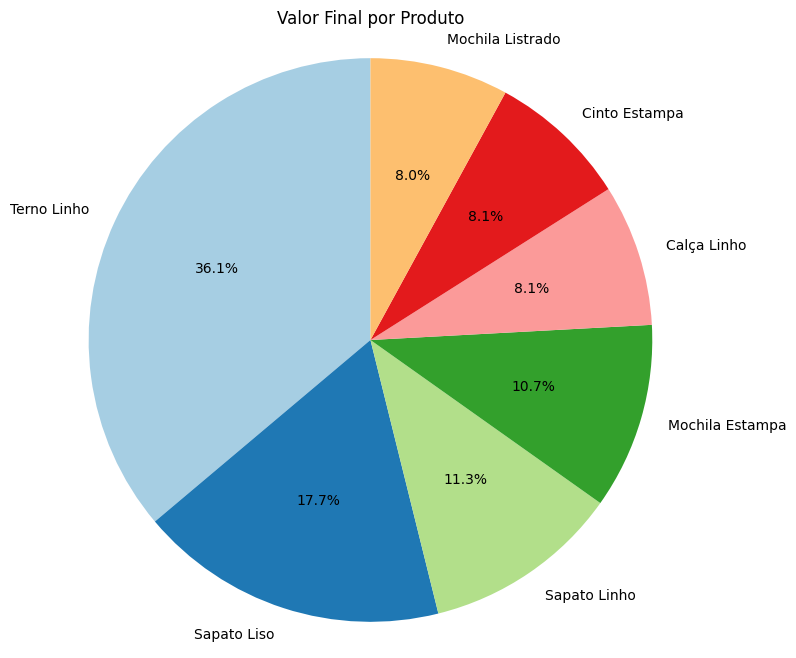

In [86]:
top_2 = df_amostra[df_amostra['ID Loja'] == 'Shopping União de Osasco']
valor_final_por_produto = top_2.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Aqui podemos notar novamente o padrão de produto de baixo valor como entre os mais vendidos, mas não aparece entre os produtos que contribui significativamente para o lucro bruto da loja.

Center Shopping Uberlândia	Top 3

,Quantidade
Produto,
Terno Estampa,11
Cueca,7
Meia Linho,6
Bermuda Xadrez,4
Pulseira Estampa,4
Gorro Estampa,4
Mochila Xadrez,4


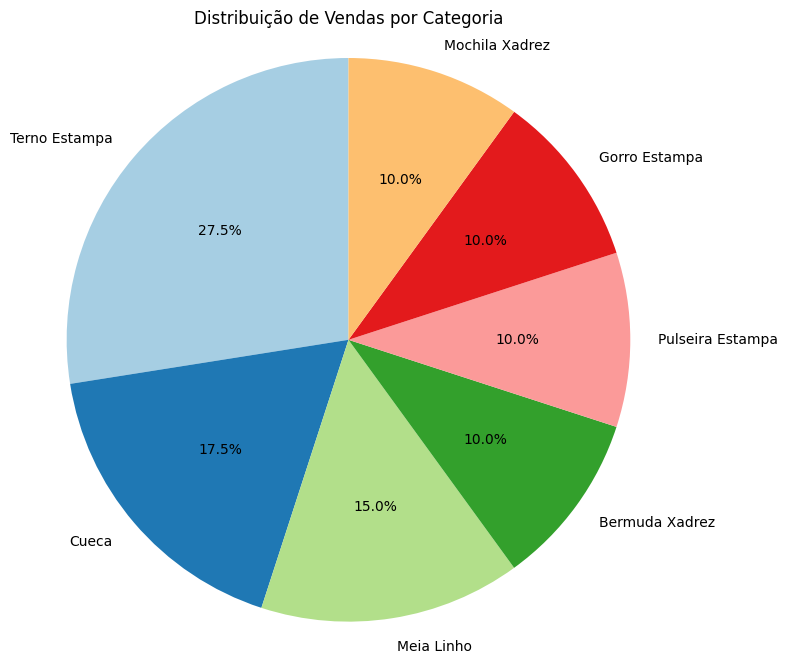

In [56]:
df_uberlandia = df_amostra[df_amostra['ID Loja'] == 'Center Shopping Uberlândia']
Center_Shopping_Uberlândia = df_uberlandia.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Center_Shopping_Uberlândia.head(7))
top_7_produtos_uberlandia = Center_Shopping_Uberlândia.head(7)
lista_produtos = top_7_produtos_uberlandia.index.tolist()
lista_quantidades = top_7_produtos_uberlandia.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

37,5 % das vendas são de produtos de medio e alto valor.

,Valor Final
Produto,
Terno Estampa,7766
Sapato Estampa,1432
Mochila Xadrez,1132
Mochila Liso,828
Tênis Liso,798
Tênis Xadrez,777
Terno,700


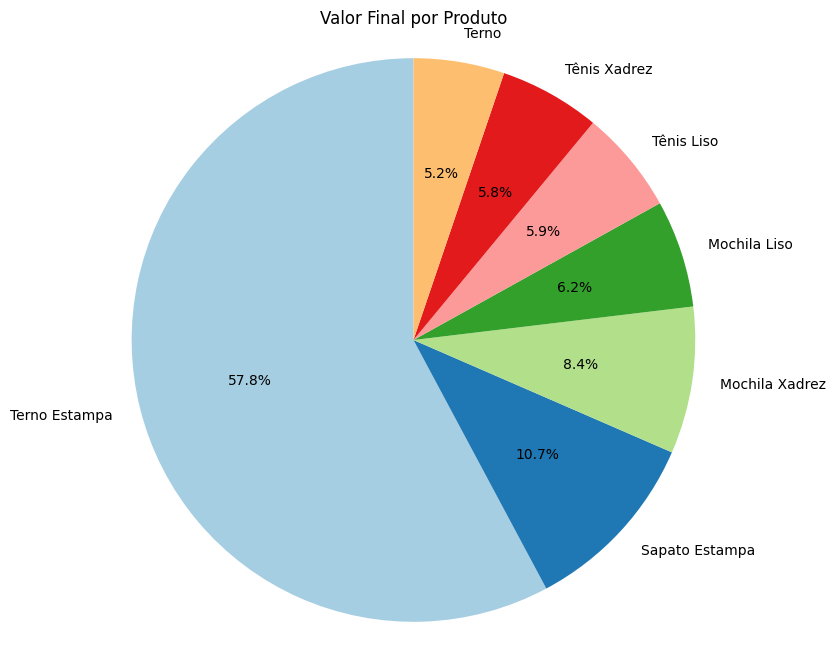

In [87]:
top_3 = df_amostra[df_amostra['ID Loja'] == 'Center Shopping Uberlândia']
valor_final_por_produto = top_3.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

novamente o padrão. agora com o item cueca. e com uma disrepancia enorme com relação a contribuição para o valor final do item terno estampa(item de alto valor)

Iguatemi Campinas

,Quantidade
Produto,
Cueca Xadrez,7
Cueca Linho,6
Chinelo Xadrez,5
Polo Liso,5
Camisa Liso,5
Sapato Liso,5
Cinto Liso,4


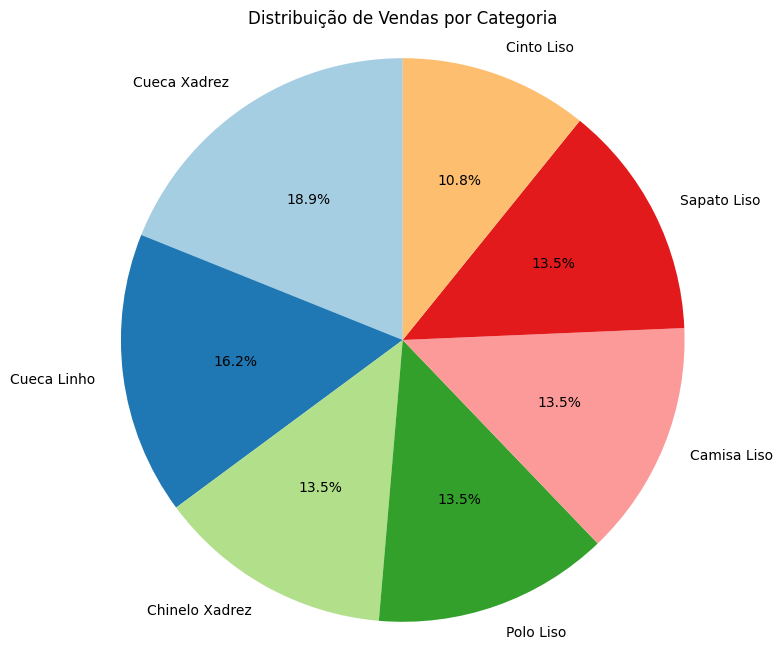

In [57]:
df_campinas = df_amostra[df_amostra['ID Loja'] == 'Iguatemi Campinas']
Iguatemi_Campinas = df_campinas.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Iguatemi_Campinas.head(7))
top_7_produtos_campinas = Iguatemi_Campinas.head(7)
lista_produtos = top_7_produtos_campinas.index.tolist()
lista_quantidades = top_7_produtos_campinas.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

13% das vendas são de produtos de medio valor.

,Valor Final
Produto,
Terno Estampa,2118
Sapato Liso,1840
Sapato Estampa,1074
Cinto Liso,836
Mochila Estampa,831
Mochila,810
Terno Linho,750


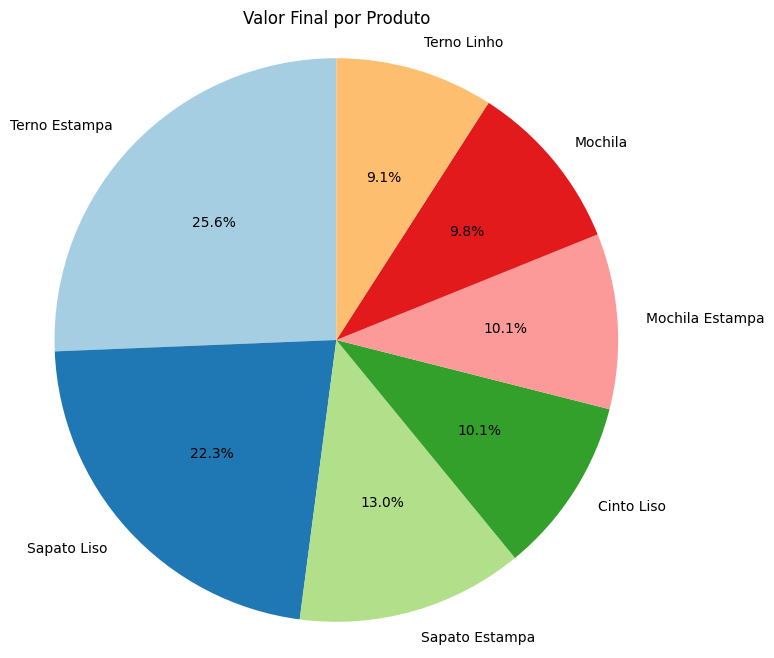

In [88]:
top_4 = df_amostra[df_amostra['ID Loja'] == 'Iguatemi Campinas']
valor_final_por_produto = top_4.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Novamente o mesmo padrão de itens de baixo valor não estarem entre os produtos que contribuem significativamente para o valor final, mesmo estando entre os produtos mais vendidos da loja.

Bourbon Shopping SP Top 5

,Quantidade
Produto,
Mochila Linho,6
Camisa Estampa,6
Cinto,5
Sunga Listrado,4
Sapato Liso,4
Camisa Gola V Liso,4
Cueca,4


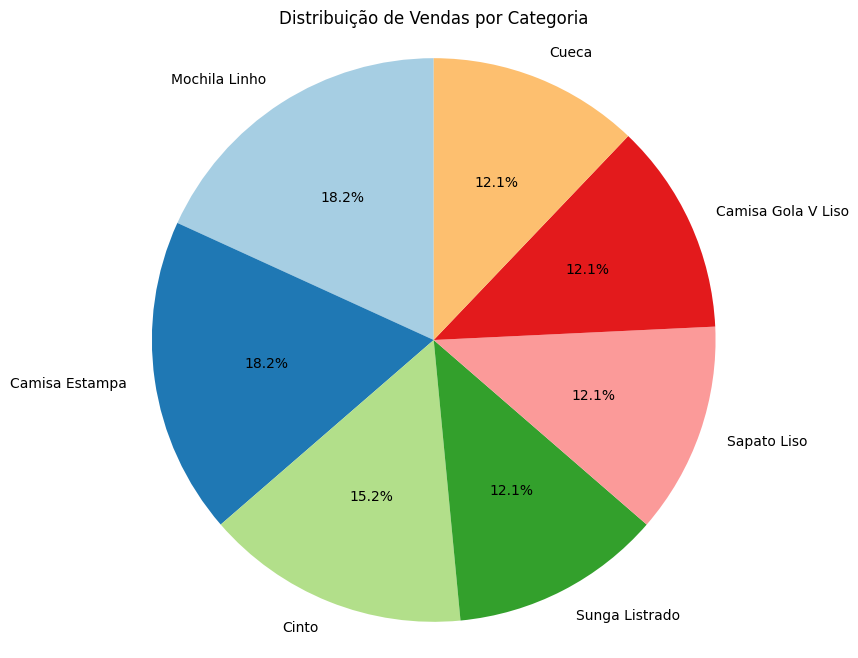

In [58]:
df_burbon = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
Bourbon_Shopping_SP = df_burbon.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Bourbon_Shopping_SP.head(7))
top_7_produtos_burbon = Bourbon_Shopping_SP.head(7)
lista_produtos = top_7_produtos_burbon.index.tolist()
lista_quantidades = top_7_produtos_burbon.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

12,1% das vendas são de produtos de medio e alto valor.

,Valor Final
Produto,
Terno,2100
Mochila Linho,1866
Sapato Liso,1472
Sapato Estampa,1074
Sapato,1050
Cinto,1000
Cinto Xadrez,860


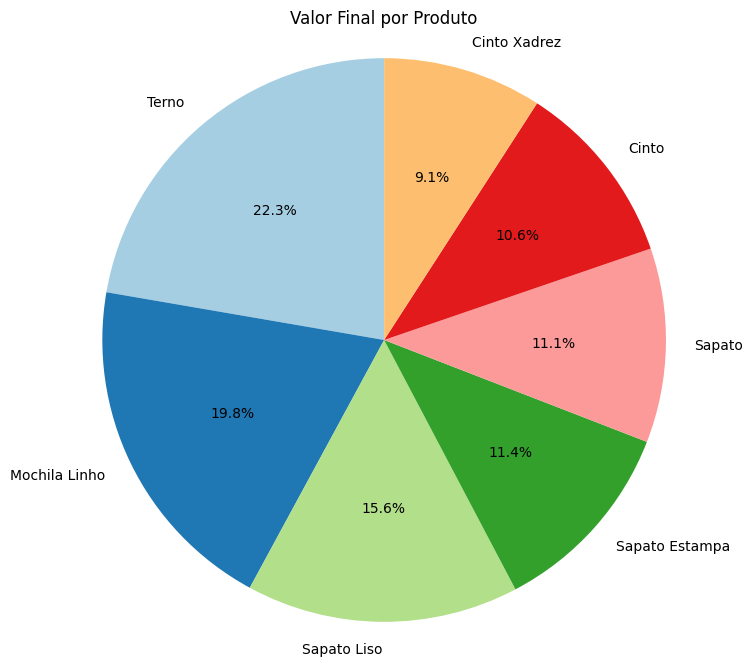

In [89]:
top_5 = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
valor_final_por_produto = top_5.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Nesta loja a ultima das 5 melhores em valor final, concretiza a idéia que de fato são os produtos de alto valor que fazem a difernça no valor final, aqui o produto terno, não esta entre os produtos mais vendidos da loja porem é a maior fatia dos produtos que contribuem para o valor final.

Informações extras dos Produtos.

Top 10 mais caros.

In [47]:
top_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').max().sort_values(by='Valor Unitário',ascending=False).head(10)
display(top_valor_produtos)

,Valor Unitário
Produto,
Terno Linho,750
Terno Liso,720
Terno Listrado,709
Terno Xadrez,709
Terno Estampa,706
Terno,700
Sapato Linho,391
Sapato Liso,368
Sapato Xadrez,368


Os 10 produdos mais baratos

In [50]:
min_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').min().sort_values(by='Valor Unitário',ascending=True).head(10)
display(min_valor_produtos)

,Valor Unitário
Produto,
Meia,30
Meia Listrado,37
Meia Liso,38
Meia Xadrez,41
Cueca,50
Meia Estampa,50
Cueca Xadrez,60
Chinelo,60
Chinelo Xadrez,66


10 produtos de valor mediano.

In [64]:
median_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').median()
display(median_valor_produtos.head(10))

,Valor Unitário
Produto,
Bermuda,150.0
Bermuda Estampa,169.0
Bermuda Linho,195.0
Bermuda Liso,157.0
Bermuda Listrado,163.0
Bermuda Xadrez,155.0
Calça,170.0
Calça Estampa,177.0
Calça Linho,211.0


Análise da lojas com menor desempenho.

Seguindo do Pior para o menhor.

Shopping Barra  bottom 1

,Quantidade
Produto,
Cueca Liso,6
Camiseta Linho,5
Cueca Xadrez,5
Gorro Xadrez,5
Relógio Estampa,5
Short Estampa,4
Meia Listrado,4


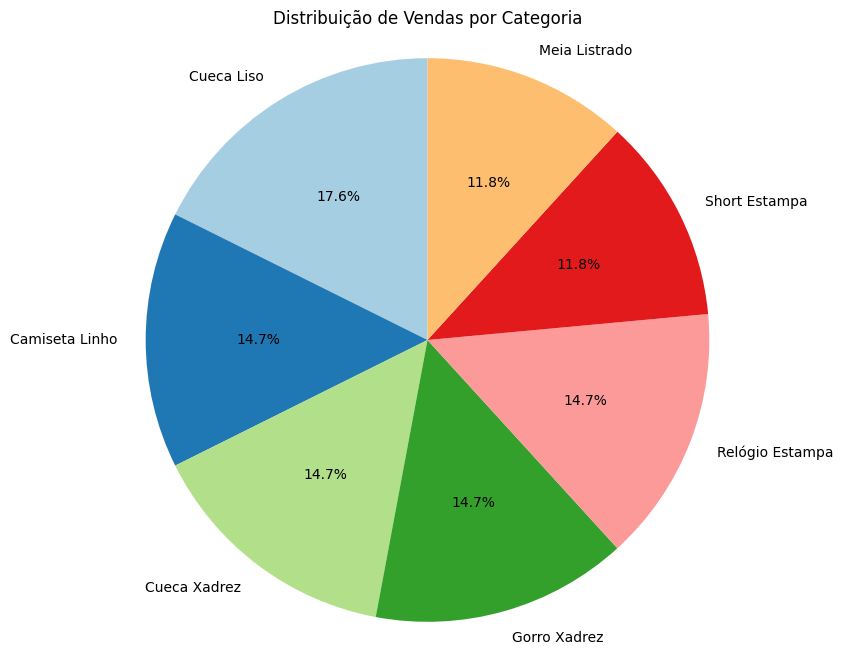

In [95]:
df_barra = df_amostra[df_amostra['ID Loja'] == 'Shopping Barra']
Shopping_Barra= df_barra.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Barra.head(7))
top_7_produtos_barra = Shopping_Barra.head(7)
lista_produtos = top_7_produtos_barra.index.tolist()
lista_quantidades = top_7_produtos_barra.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Camiseta Linho,1115
Relógio Estampa,1095
Sapato Xadrez,736
Terno,700
Casaco Listrado,538
Tênis Listrado,524
Tênis Xadrez,518


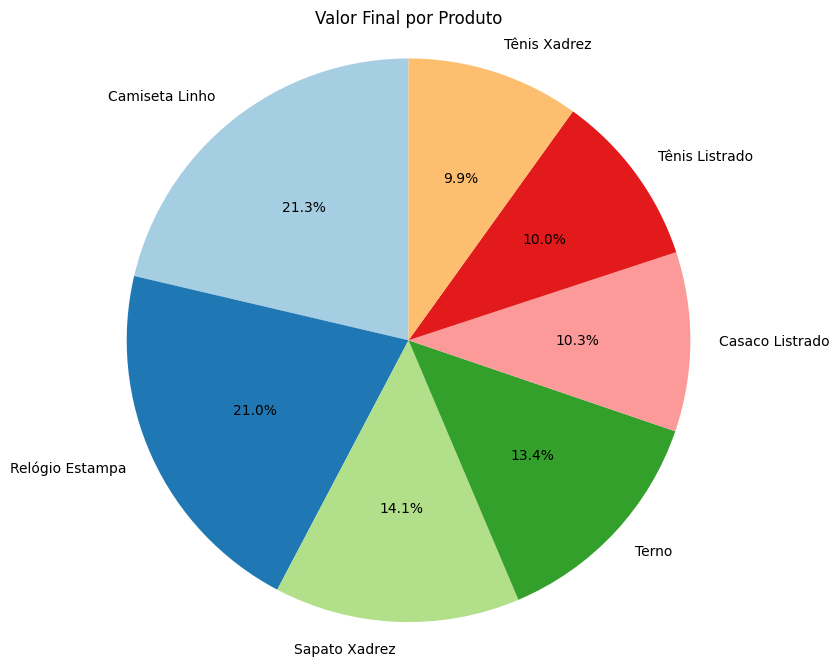

In [100]:
bottom_1 = df_amostra[df_amostra['ID Loja'] =='Shopping Barra']
valor_final_por_produto = bottom_1.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Mesmo sendo a loja com o desempenho mais baixo o padrão continua. produtos de baixo valor, mesmo sendo os produtos mais vendidos, não são a parte significativa do valor total.

,Quantidade
Produto,
Sapato Xadrez,8
Sunga,5
Casaco Listrado,5
Meia Liso,4
Meia Listrado,4
Camisa Gola V Listrado,4
Short Liso,4


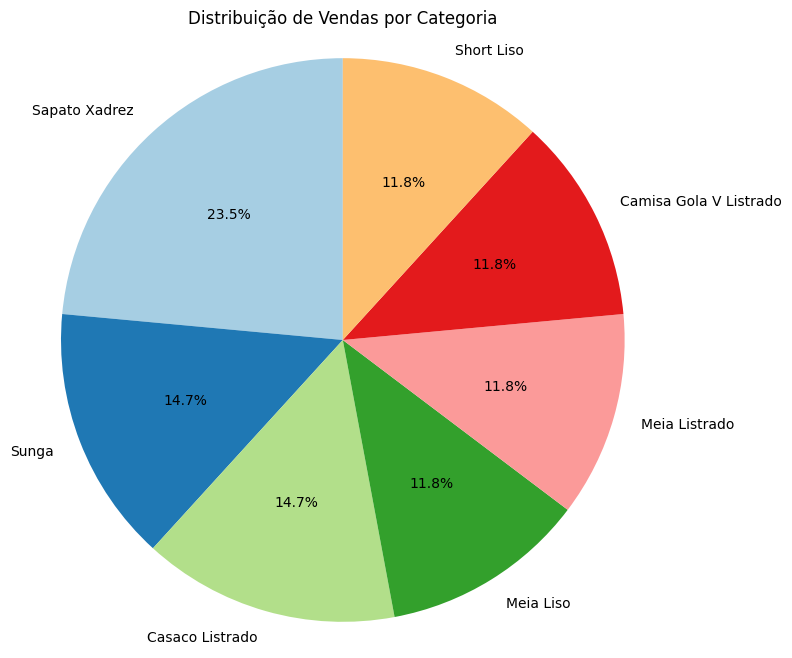

In [96]:
df_market = df_amostra[df_amostra['ID Loja'] == 'Shopping SP Market']
Shopping_SP_Market= df_market.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_SP_Market.head(7))
top_7_produtos_market = Shopping_SP_Market.head(7)
lista_produtos = top_7_produtos_market.index.tolist()
lista_quantidades = top_7_produtos_market.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Quantidade
Produto,
Meia,6
Camisa Liso,5
Camisa Gola V Estampa,5
Terno Liso,5
Sunga Liso,4
Polo Estampa,4
Sunga Estampa,3


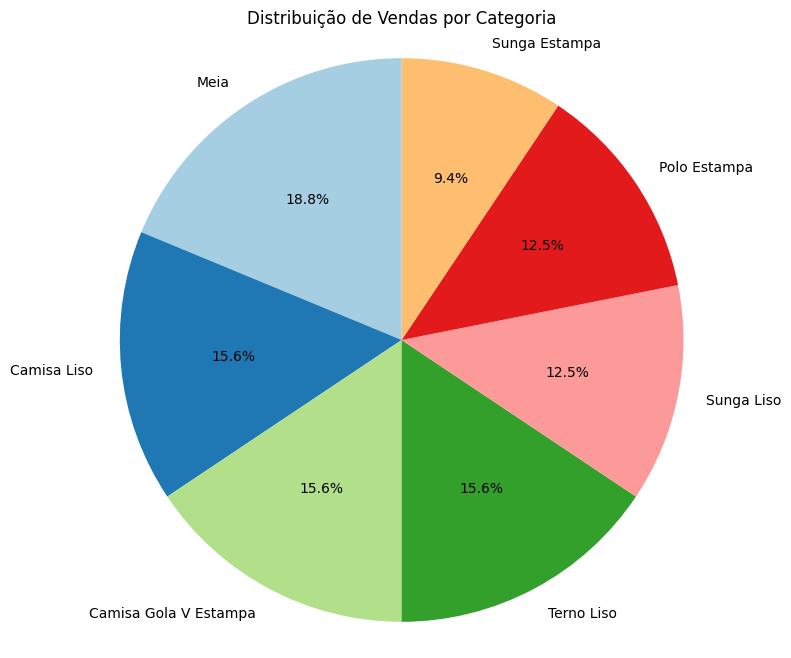

In [97]:
df_ribeirao = df_amostra[df_amostra['ID Loja'] == 'Ribeirão Shopping']
Ribeirao_Shopping = df_ribeirao.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Ribeirao_Shopping.head(7))
top_7_produtos_ribeirao = Ribeirao_Shopping.head(7)
lista_produtos = top_7_produtos_ribeirao.index.tolist()
lista_quantidades = top_7_produtos_ribeirao.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Quantidade
Produto,
Bermuda Listrado,6
Bermuda Estampa,5
Bermuda,5
Camisa Gola V Listrado,5
Sunga Xadrez,4
Casaco Liso,4
Meia,4


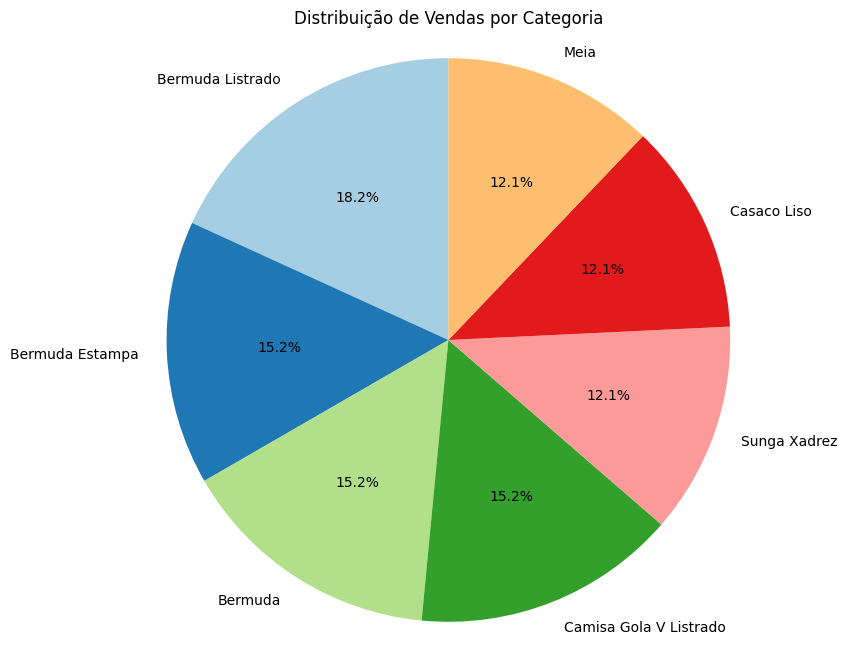

In [98]:
df_vila_velha = df_amostra[df_amostra['ID Loja'] == 'Shopping Vila Velha']
Shopping_Vila_Velha = df_vila_velha.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Vila_Velha.head(7))
top_7_produtos_velha = Shopping_Vila_Velha.head(7)
lista_produtos = top_7_produtos_velha.index.tolist()
lista_quantidades = top_7_produtos_velha.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Quantidade
Produto,
Camisa Gola V,8
Camiseta Xadrez,5
Gorro Linho,5
Relógio Linho,4
Camisa Estampa,4
Camisa Linho,4
Sunga Xadrez,3


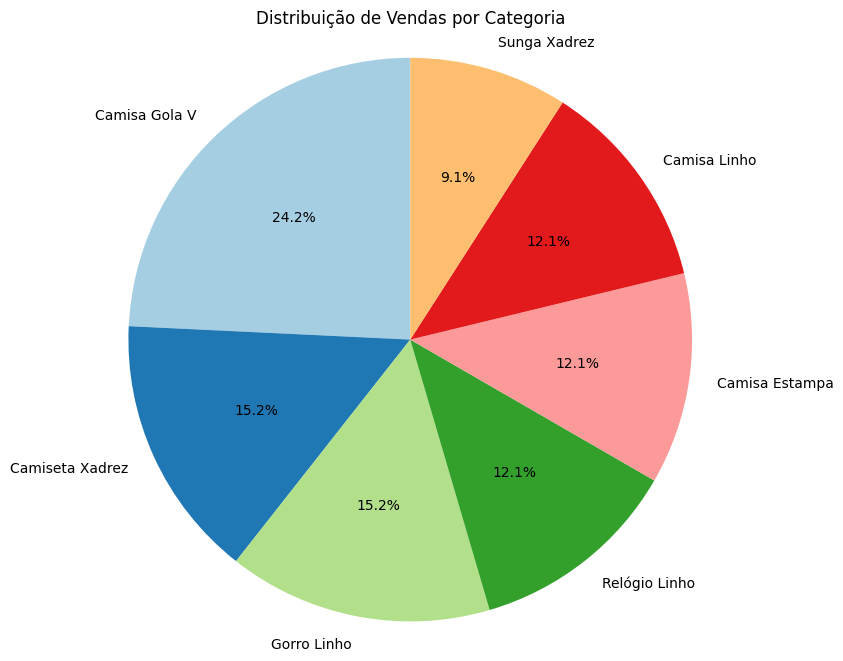

In [99]:
df_mall = df_amostra[df_amostra['ID Loja'] == 'Shopping Midway Mall']
Shopping_Midway_Mall = df_mall.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Midway_Mall .head(7))
top_7_produtos_mall = Shopping_Midway_Mall.head(7)
lista_produtos = top_7_produtos_mall.index.tolist()
lista_quantidades = top_7_produtos_mall.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()
